In [84]:
import pandas as pd
import numpy as np

In [85]:
path = './data/COVID-19_plus_Russia/csse_covid_19_data/csse_covid_19_time_series/'

In [86]:
name_recovered = 'time_series_covid19_recovered_global.csv'

In [87]:
data = pd.read_csv(path+name_recovered)
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,99,112,131,135,150,166,179,188,188,207
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,283,302,314,327,345,356,385,394,403,410
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,846,894,1047,1099,1152,1204,1355,1408,1479,1508
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,191,205,235,248,282,309,333,344,344,344
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [88]:
idx = data['Country/Region'] == 'Afghanistan'
data_afg = data[idx]
columns = data_afg.columns
date = columns[4:]


In [89]:
X_val = data_afg[date].values
X_val = X_val[0]

In [90]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    size = sequence.shape[0] 
    for i in range(size):
        
        # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > size-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [99]:
n_steps= 7
n_features = 1
X, y = split_sequence(X_val,n_steps)


In [100]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [107]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [108]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [109]:
model.fit(X, y, epochs=200, verbose=0)

In [114]:
x_input = np.array([1,2,3,4,5,6,7])

x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10.440273]]


In [115]:
import matplotlib.pyplot as plt

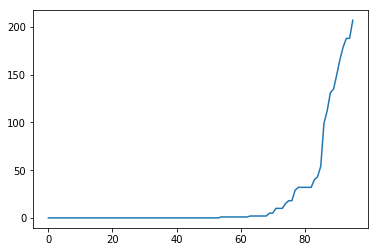

In [117]:
plt.plot(X_val)

NameError: name 'global_deaths' is not defined